In [1]:
# Advertising data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import pandas as pd

Text(0, 0.5, 'Revenue')

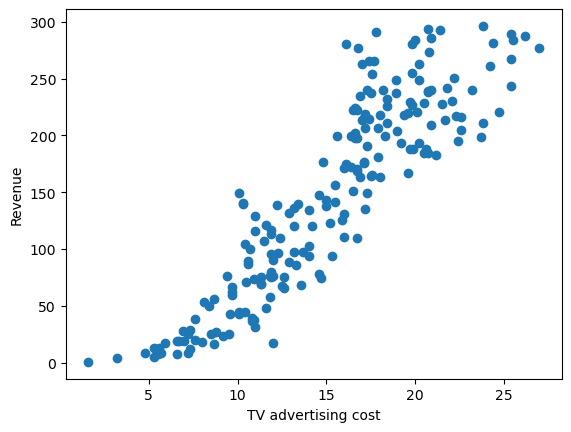

In [2]:
# Last inn data
# Kaggle: https://www.kaggle.com/datasets/ashydv/advertising-dataset
df = pd.read_csv('Uke13_advertising.csv')

# Ta ut salgsdata og TV-reklame
xVec = df["Sales"]
yVec = df["TV"]

# Plot
plt.plot(xVec, yVec, 'o')
plt.xlabel("TV advertising cost")
plt.ylabel("Revenue")

In [6]:
# Regn ut verdier
nObs = xVec.size
xBar = np.mean(xVec)
yBar = np.mean(yVec)
Sxx = np.sum((xVec-xBar)**2)
Sxy = np.sum((xVec-xBar)*(yVec-yBar))

print("nObs = ", nObs, sep = "")
print("xBar = ", round(xBar, 3), sep ="")
print("yBar = ", round(yBar, 3), sep ="")
print("Sxx = ", round(Sxx, 3), sep ="")
print("Sxy = ", round(Sxy, 3), sep ="")

nObs = 200
xBar = 15.131
yBar = 147.042
Sxx = 5555.984
Sxy = 81356.781


aHat = -74.51
bHat = 14.64
s2 = 1391.44
s = 37.3
SSE = 275504.253


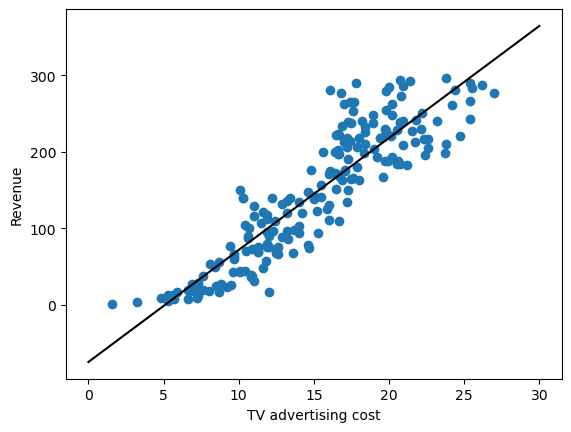

In [7]:
# Estimater
bHat = Sxy/Sxx
aHat = yBar-bHat*xBar
SSE = np.sum((yVec-aHat-bHat*xVec)**2)
s2 = SSE/(nObs-2)
s = np.sqrt(s2)

print("aHat = ", round(aHat, 2), sep = "")
print("bHat = ", round(bHat, 2), sep = "")
print("s2 = ", round(s2, 2), sep = "")
print("s = ", round(s, 2), sep = "")
print("SSE = ", round(SSE, 3), sep = "")

# Plott
plt.plot(xVec, yVec, 'o')
plt.xlabel("TV advertising cost")
plt.ylabel("Revenue")
xs = np.linspace(0, 30, 500)
ys = aHat+bHat*xs
plt.plot(xs, ys, '-k')

Sum(x^2) = 51342.39


[Text(0.5, 0, 'hat[b]')]

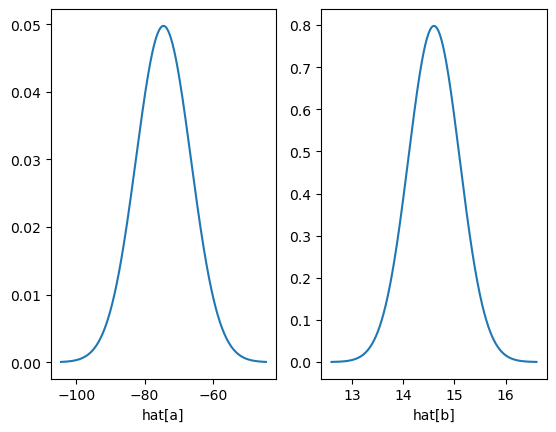

In [44]:
# Fordeling
SSX = np.sum(xVec**2)
print("Sum(x^2) = ", round(SSX,2), sep = "")

# Plott med antatt kjente verdier
alpha = -74.5
beta = 14.6
sig2 = 1391.43

xs = np.linspace(alpha-30, alpha+30, 1000)
ys = stats.norm.pdf(xs, loc = alpha, scale = np.sqrt(64.3))
fig, axs = plt.subplots(1,2)
axs[0].plot(xs, ys)
axs[0].set(xlabel="hat[a]")
xs = np.linspace(beta-2, beta+2, 1000)
ys = stats.norm.pdf(xs, loc = beta, scale = np.sqrt(0.250))
axs[1].plot(xs,ys)
axs[1].set(xlabel="hat[b]")

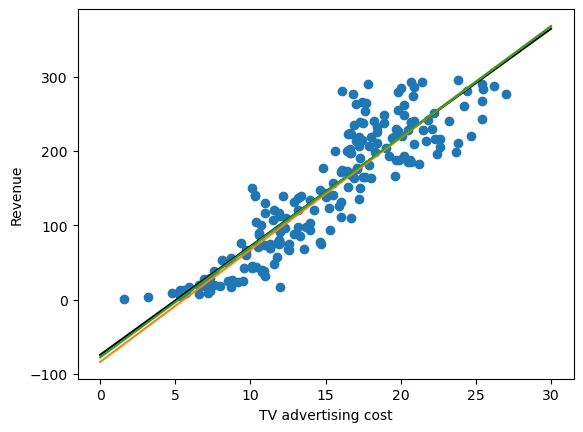

In [48]:
# Verify by simulation
nSamp = 5
aHatSamp = np.zeros(nSamp)
bHatSamp = np.zeros(nSamp)
for b in range(nSamp):
    yVecNew = alpha + beta*xVec + stats.norm.rvs(loc = 0, scale = np.sqrt(sig2), size = xVec.size)
    yBarNew = np.mean(yVecNew)
    SxyNew = np.sum((xVec-xBar)*(yVecNew-yBar))
    bHatSamp[b] = SxyNew/Sxx
    aHatSamp[b] = yBarNew-bHatSamp[b]*xBar

# Plott data
plt.plot(xVec, yVec, 'o')
plt.xlabel("TV advertising cost")
plt.ylabel("Revenue")
nLines = 2
xs = np.linspace(0, 30, 500)
ys = aHat+bHat*xs
plt.plot(xs, ys, '-k')
for b in range(nLines):
    xs = np.linspace(0, 30, 500)
    ys = aHatSamp[b]+bHatSamp[b]*xs
    plt.plot(xs, ys, '-')


In [28]:
nSamp = 2
aHatSamp = np.zeros(nSamp)
bHatSamp = np.zeros(nSamp)

In [29]:
aHatSamp

array([0., 0.])

In [38]:
nObs

200